# **Data Loading and Exploration**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
upload = files.upload()

Saving Apple Stock Prices From 1981 to 2023.zip to Apple Stock Prices From 1981 to 2023.zip


In [2]:
import zipfile
import os

zip_path = "/content/Apple Stock Prices From 1981 to 2023.zip"  # your zip file

# Create a folder to extract into
extract_folder = "/content/Apple Stock Prices From 1981 to 2023"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check extracted files
print(os.listdir(extract_folder))

['Apple Stock Prices (1981 to 2023).csv']


In [9]:
df = pd.read_csv("/content/Apple Stock Prices From 1981 to 2023/Apple Stock Prices (1981 to 2023).csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [11]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10608 non-null  datetime64[ns]
 1   Open       10608 non-null  float64       
 2   High       10608 non-null  float64       
 3   Low        10608 non-null  float64       
 4   Close      10608 non-null  float64       
 5   Adj Close  10608 non-null  float64       
 6   Volume     10608 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 580.3 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


# **Data Visualization**

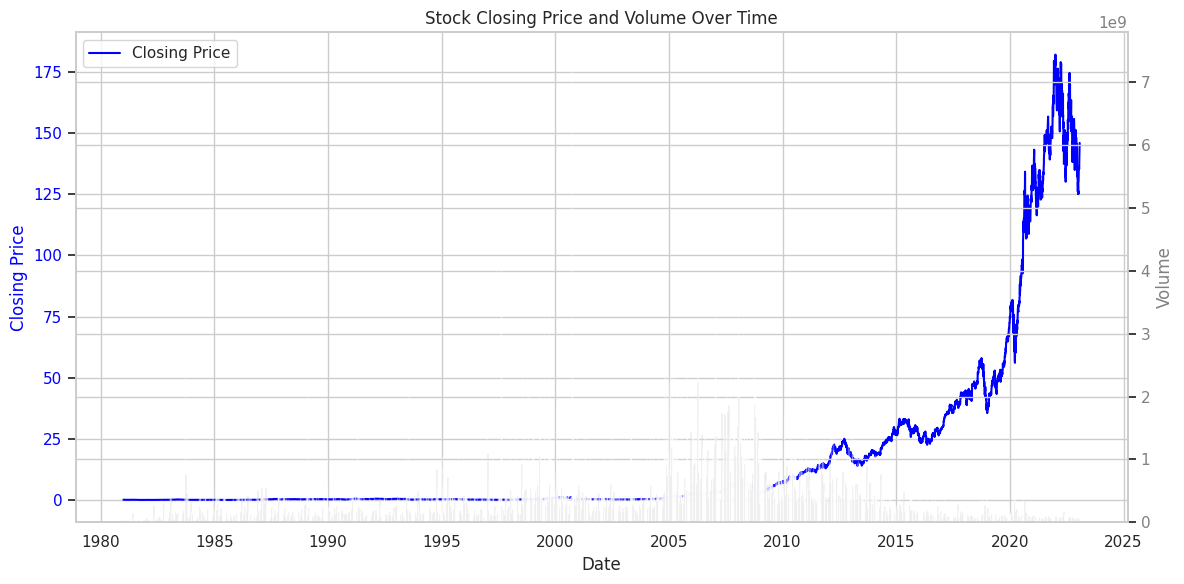

In [14]:
# Set style
sns.set(style="whitegrid")

# Create figure
fig, ax1 = plt.subplots(figsize=(12,6))

# Closing price (line)
sns.lineplot(data=df, x="Date", y="Close", ax=ax1, color="blue", label="Closing Price")
ax1.set_ylabel("Closing Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Volume (bar, secondary axis)
ax2 = ax1.twinx()
ax2.bar(df["Date"], df["Volume"], color="gray", alpha=0.3, label="Volume")
ax2.set_ylabel("Volume", color="gray")
ax2.tick_params(axis="y", labelcolor="gray")

plt.title("Stock Closing Price and Volume Over Time")
plt.xticks(rotation=45)  # rotate dates for readability
plt.tight_layout()
plt.show()

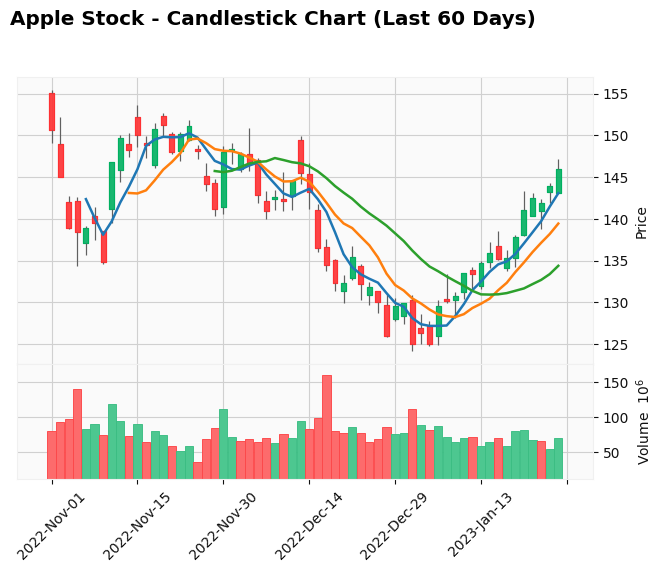

In [25]:
import mplfinance as mpf

# Plot candlestick chart
mpf.plot(
    df.tail(60),               # last 60 days
    type="candle",             # candlestick style
    volume=True,               # add volume bars
    mav=(5,10,20),             # moving averages (5, 10, 20 days)
    title="Apple Stock - Candlestick Chart (Last 60 Days)",
    style="yahoo"              # preset style
)


# **Statistical Analysis**

In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


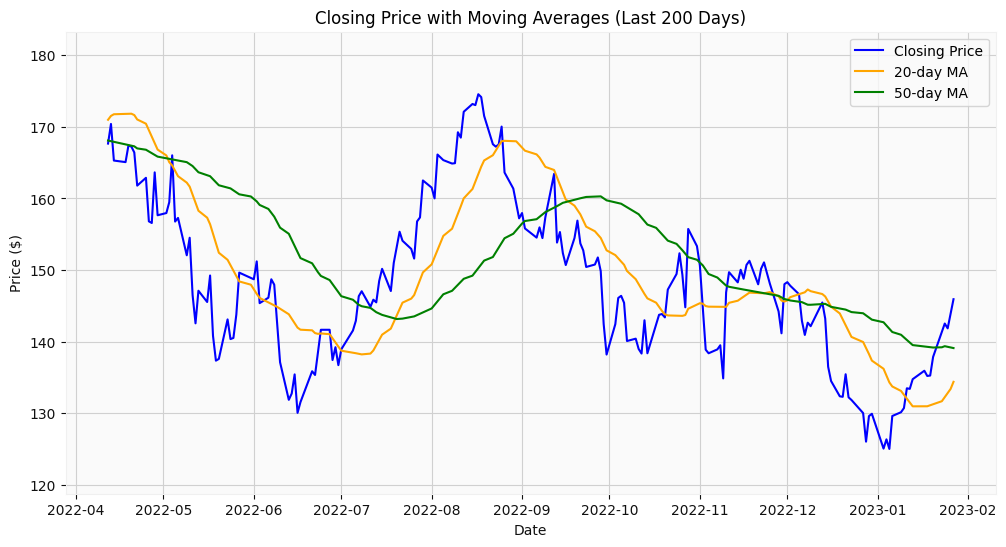

In [28]:
# Calculate moving averages
df["MA20"] = df["Close"].rolling(window=20).mean() # 20-day moving average
df["MA50"] = df["Close"].rolling(window=50).mean() # 50-day moving average

# Select the last 200 days for clearer visualization
df_recent = df.tail(200)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_recent.index, df_recent["Close"], label="Closing Price", color="blue")
plt.plot(df_recent.index, df_recent["MA20"], label="20-day MA", color="orange")
plt.plot(df_recent.index, df_recent["MA50"], label="50-day MA", color="green")
plt.title("Closing Price with Moving Averages (Last 200 Days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")

# Adjust y-axis limits for better visibility
min_price = min(df_recent["Close"].min(), df_recent["MA20"].min(), df_recent["MA50"].min())
max_price = max(df_recent["Close"].max(), df_recent["MA20"].max(), df_recent["MA50"].max())
plt.ylim(min_price * 0.95, max_price * 1.05) # Add a small buffer

plt.legend()
plt.grid(True) # Add grid for better readability
plt.show()

# **Hypothesis Testing**

In [32]:
from scipy import stats

# Pick two years to compare
df['Year'] = df.index.year

# Extract year from the Date index
prices_2020 = df.loc[df["Year"] == 2020, "Close"].dropna()
prices_2021 = df.loc[df["Year"] == 2021, "Close"].dropna()

# T-test
t_stat, p_val = stats.ttest_ind(prices_2020, prices_2021, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → average prices differ significantly.")
else:
    print("Fail to reject H0 → no evidence of difference.")

T-statistic: -27.60930316076054
P-value: 3.406208868904525e-98
Reject H0 → average prices differ significantly.


In [33]:
# Calculating daily returns
df["Return"] = df["Close"].pct_change().dropna()

# Check basic stats
print("Mean return:", np.mean(df["Return"]))
print("Std return:", np.std(df["Return"], ddof=1))

# Normality test (Shapiro-Wilk)
stat, p_val = stats.shapiro(df["Return"].dropna())
print("Shapiro-Wilk Test → Stat:", stat, " P-value:", p_val)

if p_val < 0.05:
    print("Reject H0 → returns are not normally distributed.")
else:
    print("Fail to reject H0 → returns look normal.")


Mean return: 0.0010518641495988169
Std return: 0.02823540144025811
Shapiro-Wilk Test → Stat: 0.9190583946174027  P-value: 1.7898289463728573e-59
Reject H0 → returns are not normally distributed.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10607.
  res = hypotest_fun_out(*samples, **kwds)


# **Advanced Statistical Techniques (Bonus)**

Correlation between 20-day MA of price and volume: -0.266


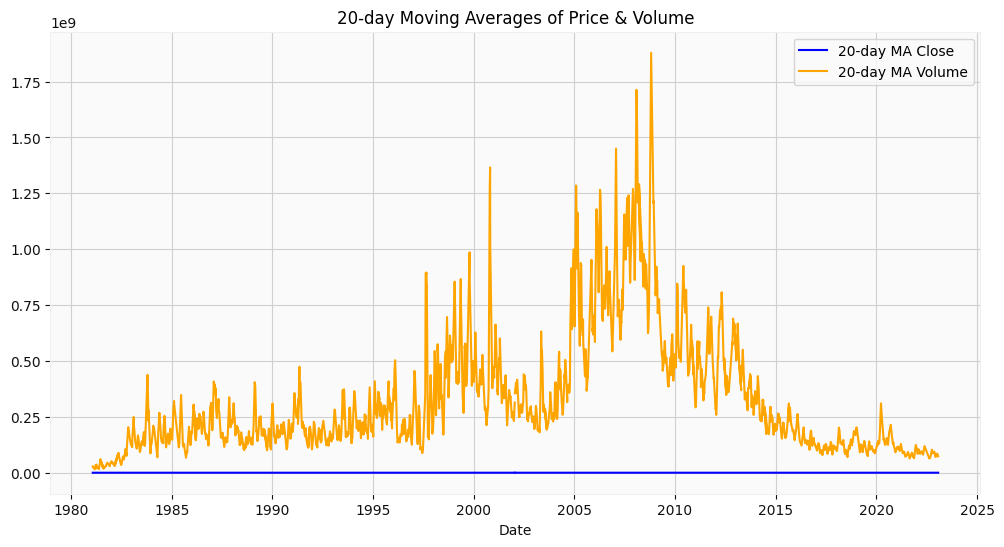

In [35]:
# Convert Close and Volume to NumPy arrays
close_prices = df["Close"].to_numpy()
volumes = df["Volume"].to_numpy()

# Define a function for simple moving average using np.convolve
def moving_average(data, window):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode="valid")

# Compute moving averages (say 20-day)
ma_close = moving_average(close_prices, 20)
ma_volume = moving_average(volumes, 20)

# Correlation between moving averages
corr = np.corrcoef(ma_close, ma_volume)[0,1]
print("Correlation between 20-day MA of price and volume:", round(corr, 3))

# Plot to visualize
plt.figure(figsize=(12,6))
# Use df.index to access the date information
plt.plot(df.index[19:], ma_close, label="20-day MA Close", color="blue")
plt.plot(df.index[19:], ma_volume, label="20-day MA Volume", color="orange")
plt.title("20-day Moving Averages of Price & Volume")
plt.xlabel("Date")
plt.legend()
plt.show()

# **Summary and Insights**

**Summary**

We analyzed Apple stock data from 1981–2023 (~10,600 records), cleaning and converting dates for time-series use. Visualizations showed long-term growth with notable dips (e.g., 2008, 2020) and trading volume spikes during stress periods. Descriptive stats and moving averages highlighted price trends, while a T-test confirmed significant differences in average prices between 2020 and 2021. Daily returns averaged ~0.1% with ~2.8% volatility, and normality testing showed returns are not normally distributed, meaning extreme events are more likely. Finally, correlation between moving averages of price and volume showed that rallies are often supported by increased trading activity.

**Insights**

Apple’s stock has grown steadily long-term but with notable volatility in crisis years.

Trading volume often spikes during market stress (sell-offs or rebounds).

Year-to-year price levels can differ significantly (confirmed with t-tests).

Daily returns are not normal → standard finance models may underestimate risk.

Price–volume correlation shows stronger rallies often happen with higher trading activity.

# **Reflection**

This project showed me how different statistical tools come together to make sense of financial data. Cleaning and structuring the dataset was key before any analysis. Visualizations and moving averages helped simplify noisy stock movements into clear trends. Hypothesis testing gave a way to confirm that differences between years weren’t just luck, while the normality test highlighted the real-world risk of extreme market moves. Looking at price–volume correlation taught me that strong rallies usually need trading activity to back them up. Overall, I learned the importance of combining descriptive stats, hypothesis tests, and advanced techniques to get both insights and reliability from stock data.